In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Leaky Integrate-and-Fire Neuron

In [2]:
def if_sim(dt=0.1, tau=10, E_L=-65, theta=-55, RI_ext=12, T=100):
    """
    The simulation of the leaky integrate-and-fire neuron. This is the most common model of the neuron 
    that removes the detailed modelling of the ion channel activations by only keeping the spike occurence as
    a significante variable.
    
    Spike occurence is modelled simply by generating a spike according to: tau * dv/dt = -(v(t) - E_L) + RI(t), 
    whenever v is higher than some threshold theta. Otherwise, the membrane potential decays and finally 
    converges to the potential that is equal to RI, if there is a constant current small enough to not generate 
    a spike, or to resting potential E_L.
    
    In this simulation, Euler's method will be used to integrate the solution of the membrane potential ODE.
    
    Parameters:
    dt (float): The time step for Euler's method (ms)
    tau (float): Time constant (ms)
    E_L (float): Resting potential (mV)
    theta (float): Firing threshold (mV)
    RI_ext (float): Constant external output (Ohm * mA = mV)
    T (float): Total steps in Euler's method (ms)
    """
    
    v = E_L
    ts = np.arange(0, T, dt)
    ss = []
    vs = []
    for t in ts:
        s = v > theta
        v = s * E_L + (1 - s) * (v - dt/tau * ((v - E_L) - RI_ext))
        
        ss.append(s)
        vs.append(v)
    
    ss = np.array(ss)
    vs = np.array(vs)
    
    fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
    
    ax1.scatter(ts[ss], ss[ss], marker='x')
    ax1.get_yaxis().set_ticks([])
    ax1.set_ylabel('Spikes')
    
    ax2.plot(ts, vs)
    ax2.set_xlabel('Time (ms)')
    ax2.set_ylabel('Membrane potential (mV)')

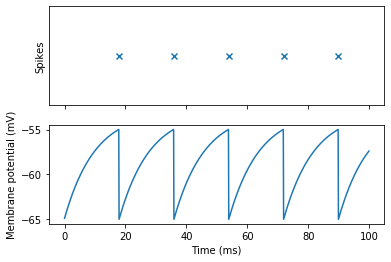

In [3]:
if_sim(RI_ext=12)